In [1]:
import quantarhei as qr
import quantarhei.spectroscopy as spec

In [2]:
qr.Manager().version

'0.0.46'

In [3]:
pways = qr.load_parcel("pways.qrp")
agg = qr.load_parcel("aggregate.qrp")

In [4]:
#for p in pways:
#    print(p)

In [5]:
ps = pways["100.0"]

In [6]:
print(len(ps))

1292


In [34]:
olow = qr.convert(400,"1/cm","int")
oup = qr.convert(600,"1/cm","int")
sps = spec.select_omega2((olow,oup),ps)
sps = spec.order_by_amplitude(sps)
sps = spec.select_type(sps,"REPH")
print(len(sps))

118


In [42]:
with qr.energy_units("1/cm"):
    print(sps[1])



Liouville Pathway R1f* (type = R) 
Weighting prefactor: (0.21475863653870689-0.01891580022549327j) 

    |3         3|  
--->|-----------|  
    |           |  
    |9         3|      10502.0
--->|-----------|  
    |           |  
    |5         3|      505.0
  >>|***********|<< 
    |           | 
    |5         3|      505.0
--->|-----------|  
    |           |  
    |0         3|      -9998.0
    |-----------|<---  
    |           |  
    |0         0|  



In [36]:
agg.report_on_expansion(3)
agg.report_on_expansion(5)
agg.report_on_expansion(4)

+-------+------------+--------------+------------------+
| index | squares    | coefficients | state signatures |
+-------+------------+--------------+------------------+
| 3     | 0.99646465 | 0.99823076   | ((1, 0), (0,))   |
| 6     | 0.00352649 | -0.05938422  | ((0, 1), (0,))   |
| 7     | 0.00000882 | -0.00296920  | ((0, 1), (1,))   |
| 4     | 0.00000003 | -0.00017723  | ((1, 0), (1,))   |
| 8     | 0.00000002 | -0.00013989  | ((0, 1), (2,))   |
+-------+------------+--------------+------------------+
+-------+------------+--------------+------------------+
| index | squares    | coefficients | state signatures |
+-------+------------+--------------+------------------+
| 6     | 0.75202257 | -0.86719235  | ((0, 1), (0,))   |
| 4     | 0.24446402 | 0.49443303   | ((1, 0), (1,))   |
| 3     | 0.00266131 | -0.05158792  | ((1, 0), (0,))   |
| 7     | 0.00084770 | -0.02911530  | ((0, 1), (1,))   |
| 8     | 0.00000433 | -0.00208031  | ((0, 1), (2,))   |
+-------+------------+---------

In [37]:
time1 = qr.TimeAxis(0.0, 100, 10.0)
time2 = qr.TimeAxis(0.0, 100, 10.0)
time3 = qr.TimeAxis(0.0, 100, 10.0)
calc = qr.MockTwoDSpectrumCalculator(time1, time2, time3)

In [47]:
pathways_to_calculate = [sps[0]] # [sps[1], sps[0]]

with qr.energy_units("1/cm"):
    calc.bootstrap(rwa=10250.0, pathways=pathways_to_calculate)

In [48]:
twod = calc.calculate_one(10)

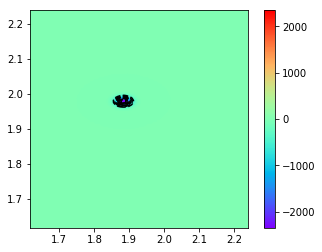

In [49]:
twod.plot()

In [50]:
print(sps[0])



Liouville Pathway R2g (type = R) 
Weighting prefactor: (-0.22770132361871981+0.020055783637254559j) 

    |0         0|  
--->|-----------|  
    |           |  
    |5         0|      2.0
    |-----------|<---  
    |           |  
    |5         3|      0.0
  >>|***********|<< 
    |           | 
    |5         3|      0.0
--->|-----------|  
    |           |  
    |0         3|      -2.0
    |-----------|<---  
    |           |  
    |0         0|  

